In [4]:
import numpy as np
import pandas as pd
from plotting import plot_tree, plot_2D_labeled_clusters, plot_multiple_2D_labeled_clusters
import matplotlib.pyplot as plt

data_18D_datapath = './../data/data_18D.txt'

data_18D = pd.read_csv(data_18D_datapath, header=None, sep=',')

data_18D.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,48,95,83,178,72,10,379,162,42,20,159,176,184,70,6,16,187,197
1,41,91,84,141,57,9,330,149,45,19,143,170,158,72,9,14,189,199
2,50,104,106,209,66,10,635,207,32,23,158,223,220,73,14,9,188,196
3,41,93,82,159,63,9,309,144,46,19,143,160,127,63,6,10,199,207
4,44,85,70,205,103,52,325,149,45,19,144,241,188,127,9,11,180,183


In [18]:
len(data_18D)

846

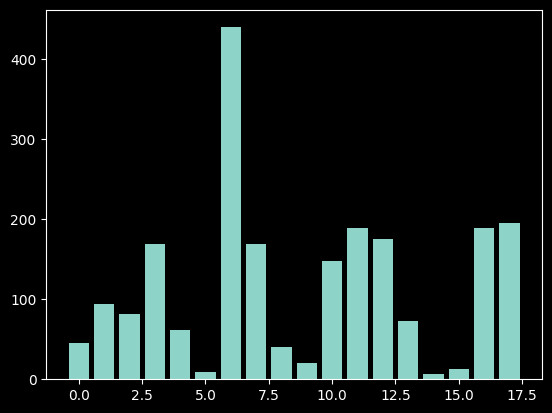

In [5]:
# plot the means of the 18D data collumns
means = data_18D.mean()
plt.bar(range(len(means)), means)

# normalize the 18D data
data_18D_normalized = (data_18D - data_18D.mean()) / data_18D.std()

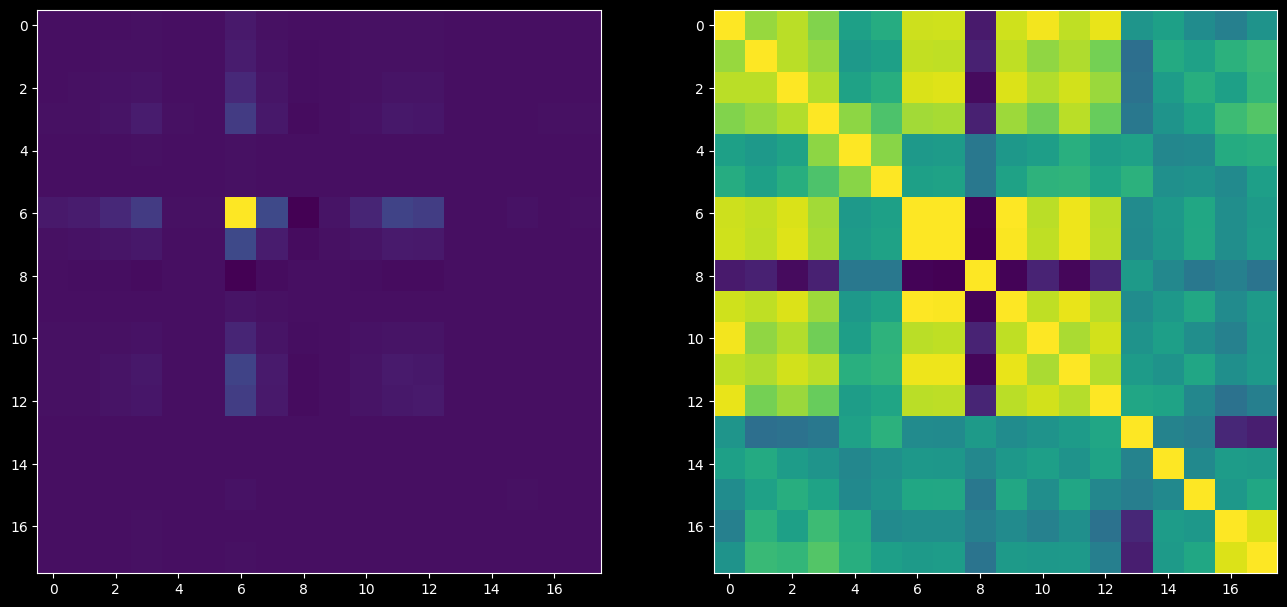

In [6]:
cov_matrix1 = data_18D.cov()
cov_matrix2 = data_18D_normalized.cov()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(cov_matrix1)
ax2.imshow(cov_matrix2)

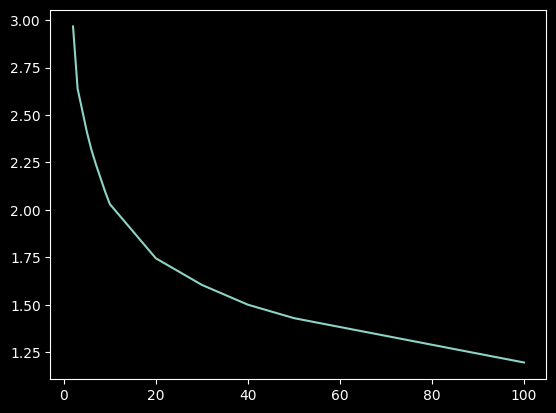

In [16]:
from kmeans import nkmeanspp
from numerics import classification_impurity

ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100]

impurities = []

np_norm_data = data_18D_normalized.to_numpy()

for k in ks:
    centers, labels = nkmeanspp(np_norm_data, k)
    impurities.append(classification_impurity(np_norm_data, labels))
    
plt.plot(ks, impurities)

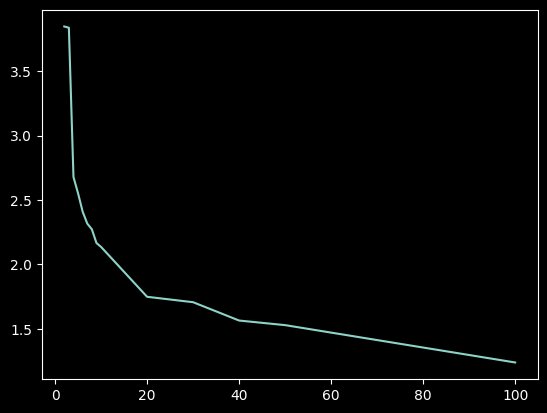

In [49]:
from spectral import spectral_clustering

impurities = []

for k in ks:
    centers, labels = spectral_clustering(np_norm_data, k)
    impurities.append(classification_impurity(np_norm_data, labels))
    
    
plt.plot(ks, impurities)

2
3
4
5
6
7
8
9
10
20
30
40
50
100


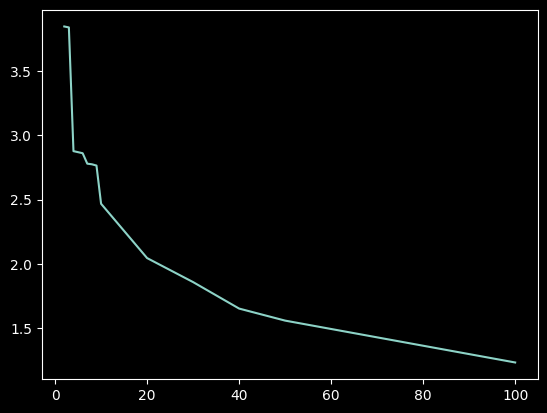

In [20]:
from hierarhical import hierarchical_lance_williams

impurities = []

for k in ks:
    print(k)
    
    labels, padre = hierarchical_lance_williams(np_norm_data, k)
    
    centers = np.zeros((k, np_norm_data.shape[1]))
    for i in range(k):
        centers[i] = np.mean(np_norm_data[labels == i], axis=0)
        
    impurities.append(classification_impurity(np_norm_data, labels))
    
    
plt.plot(ks, impurities) 

In [29]:
import networkx as nx

def plot_tree(padre, h=10, w=10):
    G = nx.DiGraph()

    for i, p in enumerate(padre):
        if p != -1:
            G.add_edge(p, i)
        else:
            root = i
            
    fig = plt.figure(figsize=(w, h))
    ax = fig.add_subplot(111)
    
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
    nx.draw(G, pos, with_labels=False, arrows=False, node_size=10, node_color='skyblue', font_size=10, font_weight='bold', ax=ax)
    plt.show()

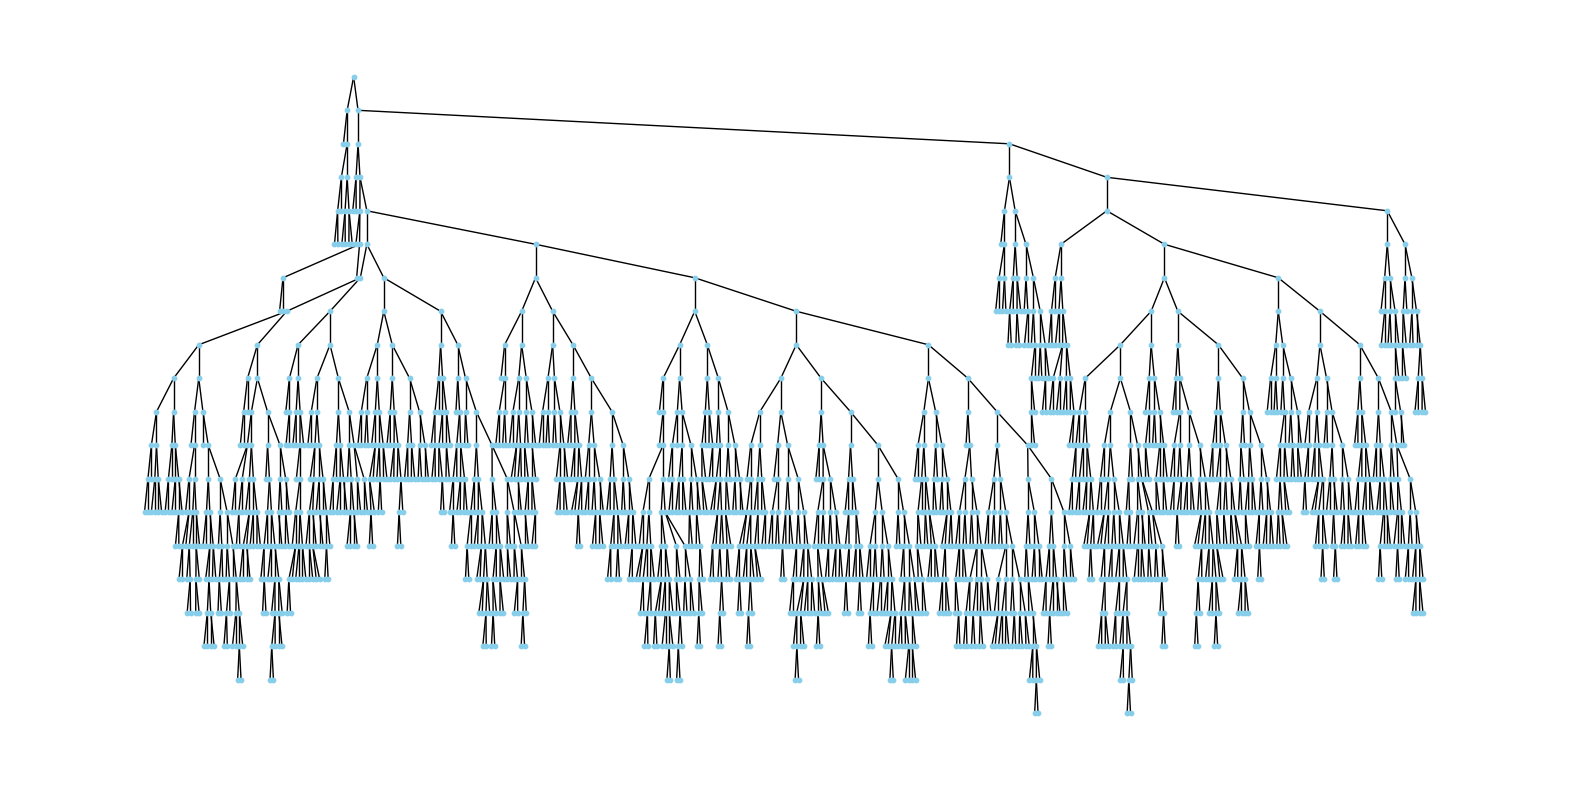

In [34]:
# from plotting import plot_tree

labels, padre = hierarchical_lance_williams(np_norm_data, 1)

plot_tree(padre, h=10, w=20)

In [35]:
def gen_G(padre):
    G = nx.DiGraph()

    for i, p in enumerate(padre):
        if p != -1:
            G.add_edge(p, i)
        else:
            root = i
            
    return G

In [ ]:
from hierarhical import merging_avg_coefs, merging_centroid_coefs, merging_complete_coefs, merging_single_coefs, merging_ward_coefs

padress = {}
labelss = {}

coefs = {
    'single': merging_single_coefs,
    'centroid': merging_centroid_coefs,
    'avg': merging_avg_coefs,
    'complete': merging_complete_coefs,
    'ward': merging_ward_coefs
}


for i, c in enumerate(coefs.items()):
    coef_name, coef = c
    impurities = []
    labels, padre = hierarchical_lance_williams(np_norm_data, 1, merging_coefs=coef)
    padress[coef_name] = padre
    labelss[coef_name] = labels
    

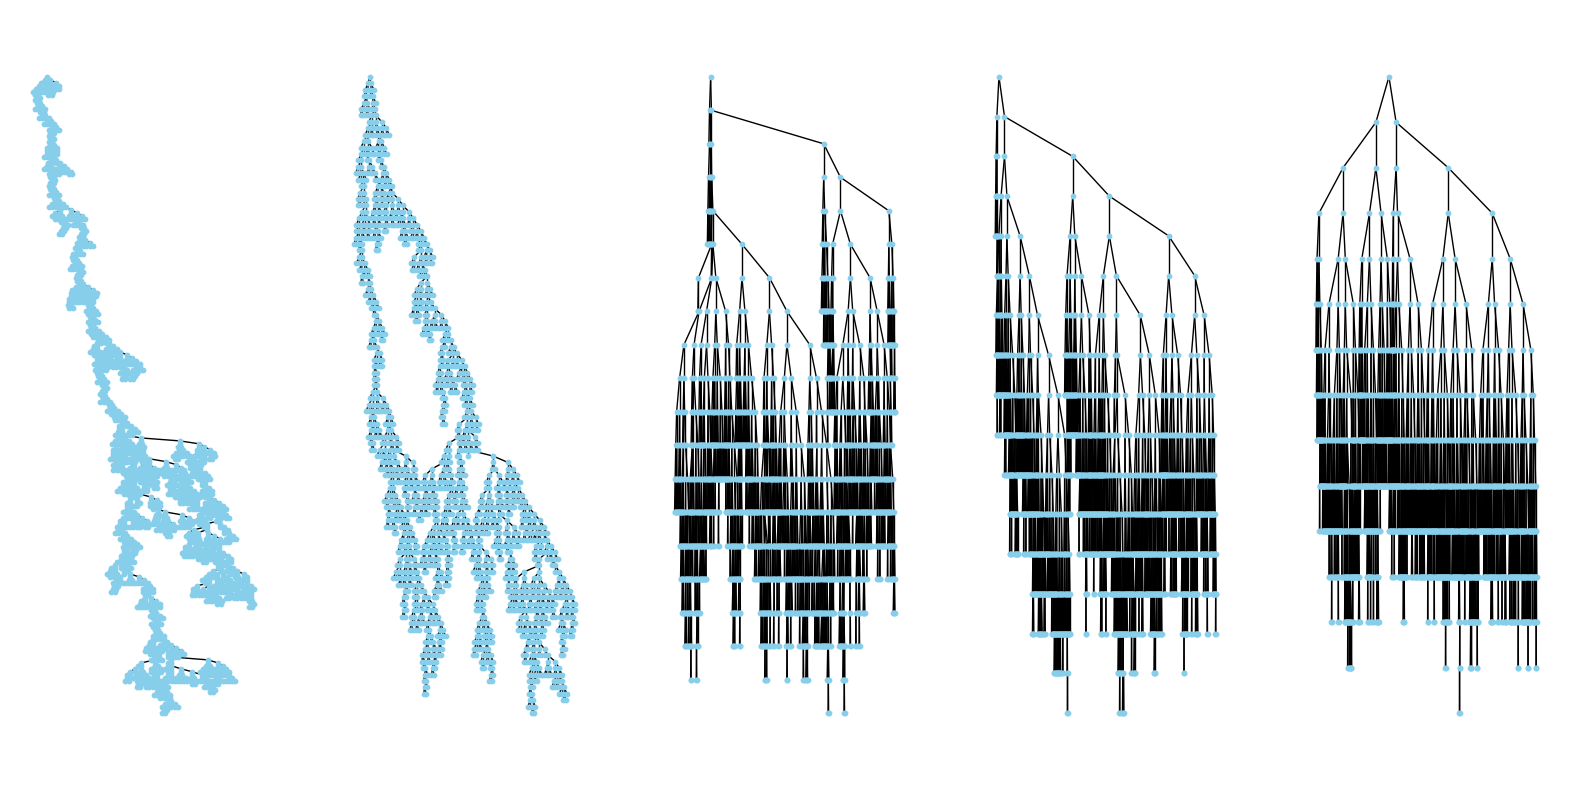

In [48]:
ax, fig = plt.subplots(1, 5, figsize=(20, 10))

for i, c in enumerate(coefs.items()):
    #draw tree
    coef_name, coef = c
    G = gen_G(padress[coef_name])
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
    nx.draw(G, pos, with_labels=False, arrows=False, node_size=10, node_color='skyblue', font_size=10, font_weight='bold', ax=fig[i])